# Using Keras to Make a CNN Model

In [1]:
# Used Website:
# https://keras.io

In [2]:
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Dimensions of training and testing data
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))
print('\n')
print('data type: {}'.format(X_train.dtype))
print('label type: {}'.format(y_train.dtype))

Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)


data type: uint8
label type: uint8


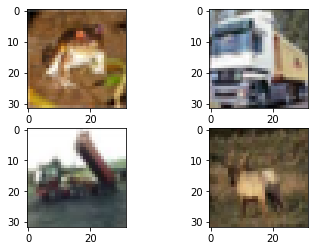

In [5]:
# Plots the first four images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [6]:
# For reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# See reshaped label data
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


In [8]:
# View one hot encoded array
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Model 1 -- 5 Epochs

In [23]:
# Model 1:
# 1 Convolutional Layer
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_1():
    model_1 = Sequential()
    model_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_1.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_1.add(Dropout(0.2))
    model_1.add(Flatten())
    model_1.add(Dense(128, activation='relu'))
    model_1.add(Dense(num_classes, activation='softmax'))
    model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model_1

In [16]:
# build the model
model_1 = model_1()
# Fit the model
hist = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_1.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 21s - loss: 1.6590 - accuracy: 0.4105 - val_loss: 1.3796 - val_accuracy: 0.5105
Epoch 2/5
 - 20s - loss: 1.3150 - accuracy: 0.5377 - val_loss: 1.2683 - val_accuracy: 0.5540
Epoch 3/5
 - 21s - loss: 1.2018 - accuracy: 0.5779 - val_loss: 1.1891 - val_accuracy: 0.5849
Epoch 4/5
 - 20s - loss: 1.1349 - accuracy: 0.6014 - val_loss: 1.1318 - val_accuracy: 0.6000
Epoch 5/5
 - 20s - loss: 1.0662 - accuracy: 0.6273 - val_loss: 1.0818 - val_accuracy: 0.6258
CNN Error: 37.42%


In [17]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
________________________________________________

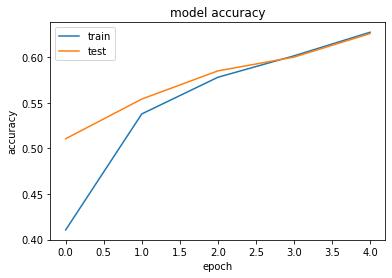

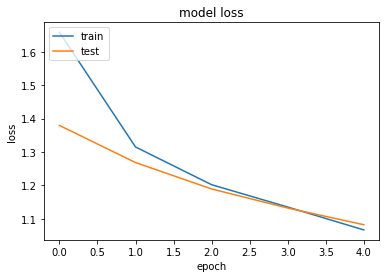

In [18]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 1 -- 10 Epochs

In [24]:
# build the model
model_11 = model_1()
# Fit the model
hist = model_11.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_11.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 1.5604 - accuracy: 0.4461 - val_loss: 1.3219 - val_accuracy: 0.5386
Epoch 2/10
 - 20s - loss: 1.2783 - accuracy: 0.5504 - val_loss: 1.2352 - val_accuracy: 0.5607
Epoch 3/10
 - 20s - loss: 1.1731 - accuracy: 0.5889 - val_loss: 1.1757 - val_accuracy: 0.5923
Epoch 4/10
 - 20s - loss: 1.1012 - accuracy: 0.6156 - val_loss: 1.1066 - val_accuracy: 0.6075
Epoch 5/10
 - 23s - loss: 1.0378 - accuracy: 0.6383 - val_loss: 1.0769 - val_accuracy: 0.6273
Epoch 6/10
 - 23s - loss: 0.9832 - accuracy: 0.6564 - val_loss: 1.0607 - val_accuracy: 0.6349
Epoch 7/10
 - 21s - loss: 0.9309 - accuracy: 0.6728 - val_loss: 1.0132 - val_accuracy: 0.6492
Epoch 8/10
 - 21s - loss: 0.8910 - accuracy: 0.6901 - val_loss: 0.9989 - val_accuracy: 0.6548
Epoch 9/10
 - 21s - loss: 0.8423 - accuracy: 0.7037 - val_loss: 0.9960 - val_accuracy: 0.6573
Epoch 10/10
 - 21s - loss: 0.8071 - accuracy: 0.7188 - val_loss: 0.9833 - val_accuracy: 0.6559
CNN Error

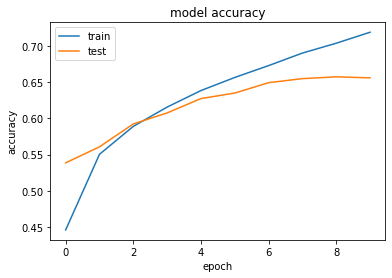

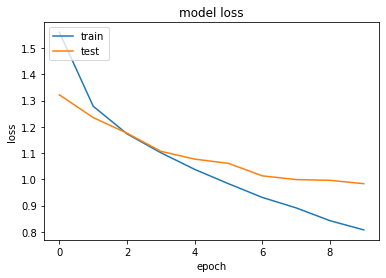

In [25]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2 -- 5 Epochs

In [29]:
# Model 2:
# 2 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_2():
    model_2 = Sequential()
    model_2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_2.add(Conv2D(32, (5, 5), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_2.add(Dropout(0.2))
    model_2.add(Flatten())
    model_2.add(Dense(128, activation='relu'))
    model_2.add(Dense(num_classes, activation='softmax'))

    model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_2

In [30]:
# build the model
model_2 = model_2()
# Fit the model
hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 65s - loss: 1.5759 - accuracy: 0.4326 - val_loss: 1.3324 - val_accuracy: 0.5226
Epoch 2/5
 - 68s - loss: 1.2338 - accuracy: 0.5619 - val_loss: 1.1390 - val_accuracy: 0.5981
Epoch 3/5
 - 67s - loss: 1.0748 - accuracy: 0.6228 - val_loss: 1.0585 - val_accuracy: 0.6318
Epoch 4/5
 - 67s - loss: 0.9715 - accuracy: 0.6604 - val_loss: 0.9974 - val_accuracy: 0.6528
Epoch 5/5
 - 67s - loss: 0.8985 - accuracy: 0.6873 - val_loss: 1.0005 - val_accuracy: 0.6542
CNN Error: 34.58%


In [31]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

# Model 2 -- 10 Epochs

In [32]:
# Model 2:
# 2 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_2():
    model_2 = Sequential()
    model_2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_2.add(Conv2D(32, (5, 5), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_2.add(Dropout(0.2))
    model_2.add(Flatten())
    model_2.add(Dense(128, activation='relu'))
    model_2.add(Dense(num_classes, activation='softmax'))

    model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_2

In [33]:
# build the model
model_2 = model_2()
# Fit the model
hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 67s - loss: 1.5284 - accuracy: 0.4484 - val_loss: 1.2838 - val_accuracy: 0.5435
Epoch 2/10
 - 80s - loss: 1.2023 - accuracy: 0.5741 - val_loss: 1.1337 - val_accuracy: 0.5954
Epoch 3/10
 - 73s - loss: 1.0606 - accuracy: 0.6268 - val_loss: 1.0266 - val_accuracy: 0.6382
Epoch 4/10
 - 71s - loss: 0.9713 - accuracy: 0.6600 - val_loss: 1.0064 - val_accuracy: 0.6492
Epoch 5/10
 - 74s - loss: 0.9076 - accuracy: 0.6862 - val_loss: 0.9721 - val_accuracy: 0.6638
Epoch 6/10
 - 72s - loss: 0.8350 - accuracy: 0.7102 - val_loss: 0.9732 - val_accuracy: 0.6648
Epoch 7/10
 - 75s - loss: 0.7825 - accuracy: 0.7291 - val_loss: 0.9365 - val_accuracy: 0.6801
Epoch 8/10
 - 69s - loss: 0.7270 - accuracy: 0.7460 - val_loss: 0.9457 - val_accuracy: 0.6740
Epoch 9/10
 - 73s - loss: 0.6733 - accuracy: 0.7656 - val_loss: 0.9203 - val_accuracy: 0.6923
Epoch 10/10
 - 69s - loss: 0.6172 - accuracy: 0.7853 - val_loss: 0.9279 - val_accuracy: 0.6861
CNN Error

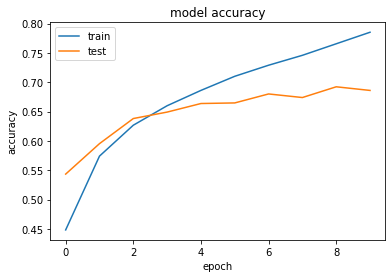

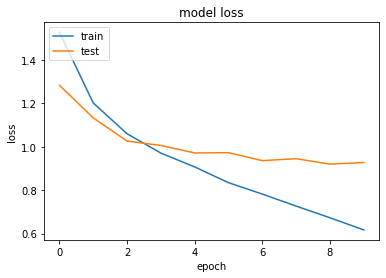

In [34]:
# summarize history for accuracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2 -- 20 Epochs

In [37]:
# Model 2:
# 2 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_2():
    model_2 = Sequential()
    model_2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_2.add(Conv2D(32, (5, 5), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_2.add(Dropout(0.2))
    model_2.add(Flatten())
    model_2.add(Dense(128, activation='relu'))
    model_2.add(Dense(num_classes, activation='softmax'))

    model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_2

In [38]:
# build the model
model_2 = model_2()
# Fit the model
hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 70s - loss: 1.5815 - accuracy: 0.4320 - val_loss: 1.3222 - val_accuracy: 0.5279
Epoch 2/20
 - 74s - loss: 1.2646 - accuracy: 0.5501 - val_loss: 1.1746 - val_accuracy: 0.5795
Epoch 3/20
 - 73s - loss: 1.1130 - accuracy: 0.6074 - val_loss: 1.0654 - val_accuracy: 0.6257
Epoch 4/20
 - 74s - loss: 1.0156 - accuracy: 0.6430 - val_loss: 1.0468 - val_accuracy: 0.6344
Epoch 5/20
 - 69s - loss: 0.9453 - accuracy: 0.6693 - val_loss: 1.0052 - val_accuracy: 0.6466
Epoch 6/20
 - 75s - loss: 0.8700 - accuracy: 0.6943 - val_loss: 0.9499 - val_accuracy: 0.6685
Epoch 7/20
 - 72s - loss: 0.8050 - accuracy: 0.7174 - val_loss: 0.9648 - val_accuracy: 0.6607
Epoch 8/20
 - 68s - loss: 0.7562 - accuracy: 0.7326 - val_loss: 0.9489 - val_accuracy: 0.6723
Epoch 9/20
 - 78s - loss: 0.6934 - accuracy: 0.7578 - val_loss: 0.9365 - val_accuracy: 0.6828
Epoch 10/20
 - 72s - loss: 0.6364 - accuracy: 0.7769 - val_loss: 0.9379 - val_accuracy: 0.6845
Epoch 11/

# Model 3 -- 5 Epochs

In [41]:
# Model 3:
# 3 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_3():
    model_3 = Sequential()
    model_3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_3.add(Conv2D(32, (5, 5), activation='relu'))
    model_3.add(Conv2D(32, (5, 5), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_3.add(Dropout(0.2))
    model_3.add(Flatten())
    model_3.add(Dense(128, activation='relu'))
    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_3

In [42]:
# build the model
model_3 = model_3()
# Fit the model
hist_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_3.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 91s - loss: 1.6383 - accuracy: 0.4028 - val_loss: 1.4188 - val_accuracy: 0.4945
Epoch 2/5
 - 92s - loss: 1.3179 - accuracy: 0.5312 - val_loss: 1.2143 - val_accuracy: 0.5700
Epoch 3/5
 - 91s - loss: 1.1628 - accuracy: 0.5879 - val_loss: 1.1227 - val_accuracy: 0.6058
Epoch 4/5
 - 96s - loss: 1.0637 - accuracy: 0.6240 - val_loss: 1.0528 - val_accuracy: 0.6315
Epoch 5/5
 - 104s - loss: 0.9778 - accuracy: 0.6583 - val_loss: 1.0047 - val_accuracy: 0.6441
CNN Error: 35.59%


In [43]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

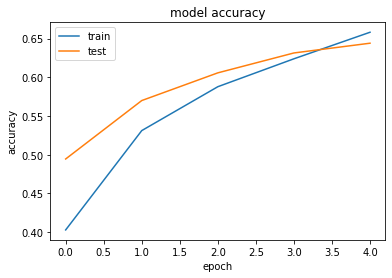

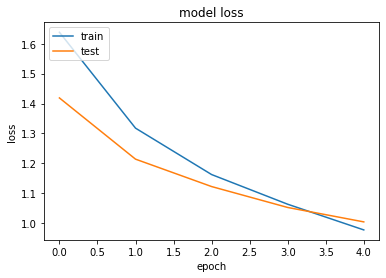

In [44]:
# summarize history for accuracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 3 -- 10 Epochs

In [45]:
# Model 3:
# 3 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_3():
    model_3 = Sequential()
    model_3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_3.add(Conv2D(32, (5, 5), activation='relu'))
    model_3.add(Conv2D(32, (5, 5), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_3.add(Dropout(0.2))
    model_3.add(Flatten())
    model_3.add(Dense(128, activation='relu'))
    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_3

In [46]:
# build the model
model_3 = model_3()
# Fit the model
hist_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_3.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 85s - loss: 1.6380 - accuracy: 0.4012 - val_loss: 1.4187 - val_accuracy: 0.4793
Epoch 2/10
 - 89s - loss: 1.3026 - accuracy: 0.5330 - val_loss: 1.1993 - val_accuracy: 0.5744
Epoch 3/10
 - 89s - loss: 1.1340 - accuracy: 0.5989 - val_loss: 1.0993 - val_accuracy: 0.6113
Epoch 4/10
 - 89s - loss: 1.0334 - accuracy: 0.6376 - val_loss: 1.0134 - val_accuracy: 0.6437
Epoch 5/10
 - 88s - loss: 0.9267 - accuracy: 0.6758 - val_loss: 0.9741 - val_accuracy: 0.6568
Epoch 6/10
 - 91s - loss: 0.8544 - accuracy: 0.7008 - val_loss: 0.9644 - val_accuracy: 0.6617
Epoch 7/10
 - 89s - loss: 0.7984 - accuracy: 0.7216 - val_loss: 0.9647 - val_accuracy: 0.6622
Epoch 8/10
 - 4421s - loss: 0.7529 - accuracy: 0.7360 - val_loss: 0.9402 - val_accuracy: 0.6793
Epoch 9/10
 - 3736s - loss: 0.6874 - accuracy: 0.7587 - val_loss: 0.9016 - val_accuracy: 0.6916
Epoch 10/10
 - 9553s - loss: 0.6393 - accuracy: 0.7762 - val_loss: 0.9383 - val_accuracy: 0.6914
CNN

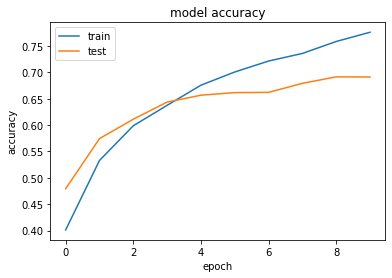

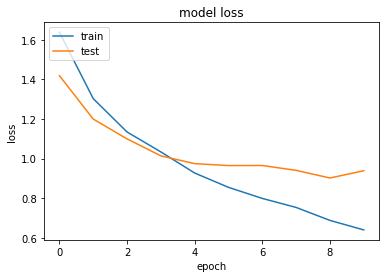

In [48]:
# summarize history for accuracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 4 -- 5 Epochs

In [49]:
# Model 4:
# 4 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_4():
    model_4 = Sequential()
    model_4.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_4.add(Dropout(0.2))
    model_4.add(Flatten())
    model_4.add(Dense(128, activation='relu'))
    model_4.add(Dense(num_classes, activation='softmax'))

    model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_4

In [50]:
# build the model
model_4 = model_4()
# Fit the model
hist_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_4.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 151s - loss: 1.7100 - accuracy: 0.3739 - val_loss: 1.4815 - val_accuracy: 0.4555
Epoch 2/5
 - 108s - loss: 1.3966 - accuracy: 0.4932 - val_loss: 1.3012 - val_accuracy: 0.5261
Epoch 3/5
 - 112s - loss: 1.2654 - accuracy: 0.5473 - val_loss: 1.2389 - val_accuracy: 0.5573
Epoch 4/5
 - 115s - loss: 1.1851 - accuracy: 0.5791 - val_loss: 1.1908 - val_accuracy: 0.5746
Epoch 5/5
 - 119s - loss: 1.1053 - accuracy: 0.6086 - val_loss: 1.1325 - val_accuracy: 0.5988
CNN Error: 40.12%


In [51]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)             

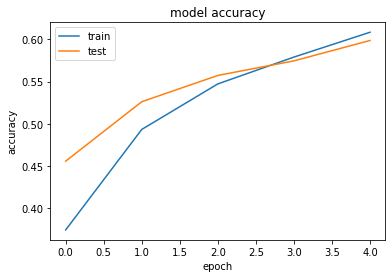

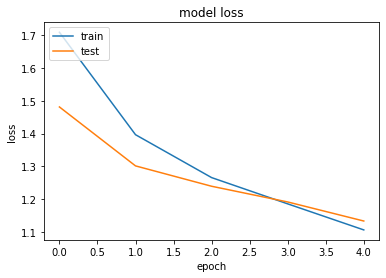

In [52]:
# summarize history for accuracy
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 4 -- 10 Epochs

In [53]:
# Model 4:
# 4 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model_4():
    model_4 = Sequential()
    model_4.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(Conv2D(32, (5, 5), activation='relu'))
    model_4.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model_4.add(Dropout(0.2))
    model_4.add(Flatten())
    model_4.add(Dense(128, activation='relu'))
    model_4.add(Dense(num_classes, activation='softmax'))

    model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_4

In [54]:
# build the model
model_4 = model_4()
# Fit the model
hist_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_4.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 110s - loss: 1.7317 - accuracy: 0.3657 - val_loss: 1.4703 - val_accuracy: 0.4710
Epoch 2/10
 - 117s - loss: 1.3714 - accuracy: 0.5026 - val_loss: 1.2777 - val_accuracy: 0.5425
Epoch 3/10
 - 118s - loss: 1.2403 - accuracy: 0.5584 - val_loss: 1.2182 - val_accuracy: 0.5656
Epoch 4/10
 - 115s - loss: 1.1395 - accuracy: 0.5958 - val_loss: 1.1259 - val_accuracy: 0.6024
Epoch 5/10
 - 112s - loss: 1.0520 - accuracy: 0.6291 - val_loss: 1.0961 - val_accuracy: 0.6144
Epoch 6/10
 - 107s - loss: 0.9868 - accuracy: 0.6515 - val_loss: 1.0134 - val_accuracy: 0.6413
Epoch 7/10
 - 107s - loss: 0.9325 - accuracy: 0.6716 - val_loss: 0.9869 - val_accuracy: 0.6561
Epoch 8/10
 - 181s - loss: 0.8815 - accuracy: 0.6909 - val_loss: 0.9752 - val_accuracy: 0.6573
Epoch 9/10
 - 108s - loss: 0.8355 - accuracy: 0.7060 - val_loss: 0.9279 - val_accuracy: 0.6771
Epoch 10/10
 - 110s - loss: 0.7938 - accuracy: 0.7221 - val_loss: 0.9485 - val_accuracy: 0.6755

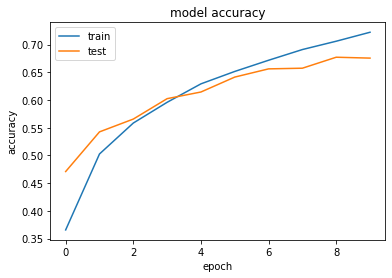

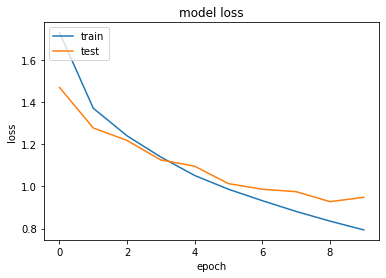

In [56]:
# summarize history for accuracy
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()